In [ ]:
Bubble Plots

Objectives
Visualize the distribution of data.

Visualize the relationship between two data features.

Visualize composition of data.

Visualize comparison of data.

In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
r = requests.get(url)
with open("survey-data.csv", "wb") as f:
    f.write(r.content)
print("Download complete.")

Download complete.


In [4]:
df = pd.read_csv("survey-data.csv")


In [5]:

#  columns 
print(df.columns)

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


In [6]:
# List columns that contain 'Freq' or 'Part' to find participation frequency
participation_cols = [col for col in df.columns if 'Freq' in col or 'Part' in col]
print(participation_cols)

['SOVisitFreq', 'SOPartFreq', 'Frequency_1', 'Frequency_2', 'Frequency_3']


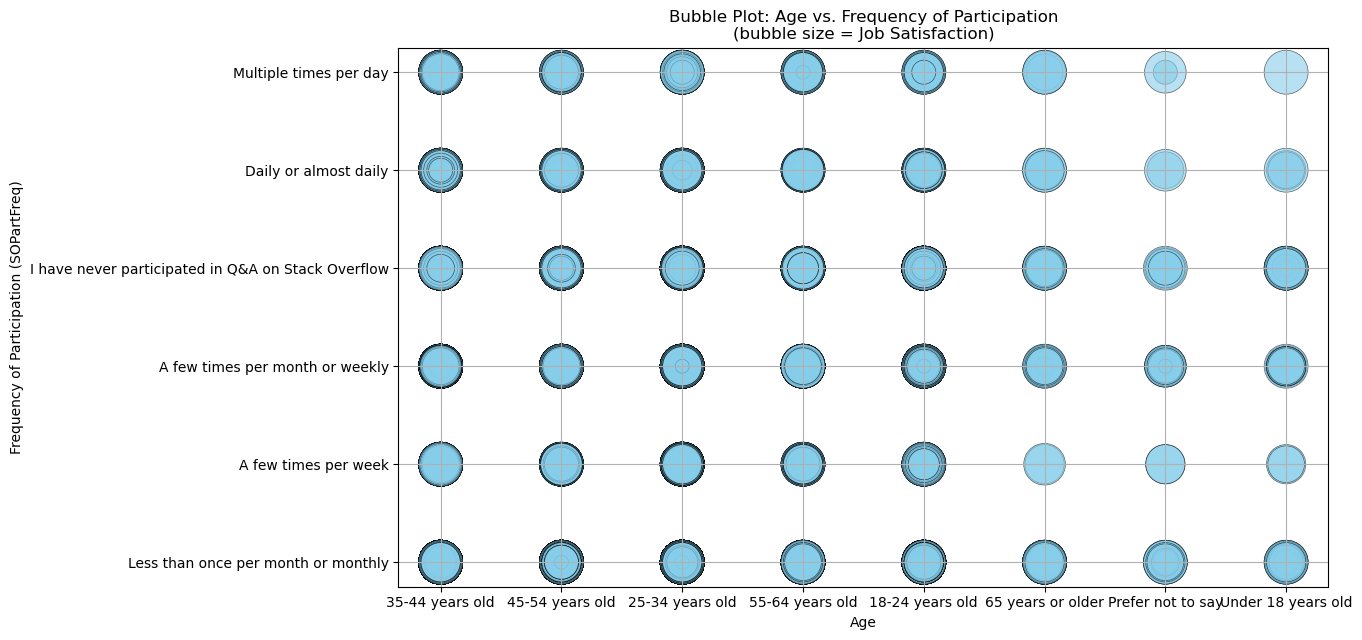

In [7]:


# Check for missing data in the required columns and drop them to avoid plotting errors
df_clean = df.dropna(subset=['Age', 'SOPartFreq', 'JobSat'])

# Scale bubble sizes (JobSat) for visibility
sizes = df_clean['JobSat'] * 100

# Plot
plt.figure(figsize=(12, 7))
scatter = plt.scatter(
    df_clean['Age'], 
    df_clean['SOPartFreq'], 
    s=sizes, 
    alpha=0.6, 
    c='skyblue', 
    edgecolors='black', 
    linewidth=0.5
)

plt.xlabel('Age')
plt.ylabel('Frequency of Participation (SOPartFreq)')
plt.title('Bubble Plot: Age vs. Frequency of Participation\n(bubble size = Job Satisfaction)')
plt.grid(True)
plt.show()


In [ ]:
2. Bubble Plot for Compensation vs. Job Satisfaction
-Visualize the relationship between yearly compensation (ConvertedCompYearly) and job satisfaction (JobSat).

Use the size of the bubbles to represent respondents’ age.

In [11]:
print(df_clean[['ConvertedCompYearly', 'JobSat', 'Age']].dtypes)
print(df_clean.shape, sizes.shape)


ConvertedCompYearly    float64
JobSat                 float64
Age                     object
dtype: object
(16075, 114) (16075,)


In [12]:
# Convert Age to numeric, coerce errors to NaN (e.g., 'Under 18', '65 or older')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')


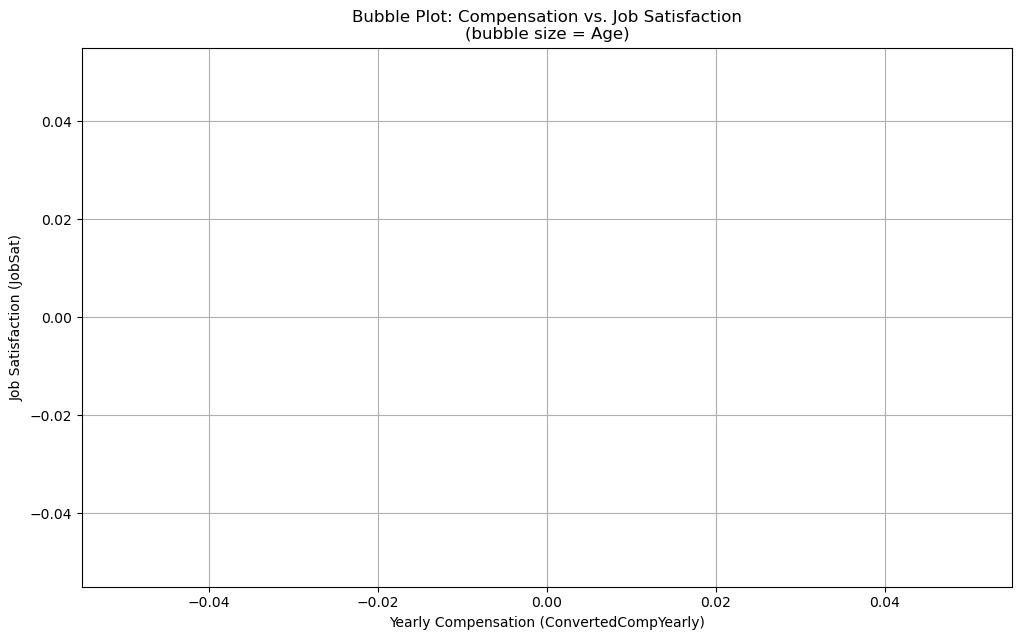

In [13]:


# Drop rows with missing values in relevant columns
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSat', 'Age'])

# Ensure all sizes are positive numbers and matches shape
sizes = df_clean['Age'].astype(float) * 5  # Must match df_clean's shape exactly

plt.figure(figsize=(12, 7))

plt.scatter(
    df_clean['ConvertedCompYearly'], 
    df_clean['JobSat'], 
    s=sizes, 
    alpha=0.6, 
    c='orange', 
    edgecolors='black', 
    linewidth=0.5
)

plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (JobSat)')
plt.title('Bubble Plot: Compensation vs. Job Satisfaction\n(bubble size = Age)')
plt.grid(True)
plt.show()


In [ ]:
Task 2: Analyzing Relationships Using Bubble Plots
1. Bubble Plot of Technology Preferences by Age
Visualize the popularity of programming languages respondents have worked with (LanguageHaveWorkedWith) across age groups.

Use bubble size to represent the frequency of each language.

In [20]:
df_clean['Age'] = pd.to_numeric(df_clean['Age'], errors='coerce')
df_clean = df_clean.dropna(subset=['Age', 'LanguageHaveWorkedWith'])

# Keep only ages between 18 and 65 to reduce data size
df_clean = df_clean[(df_clean['Age'] >= 18) & (df_clean['Age'] <= 65)]


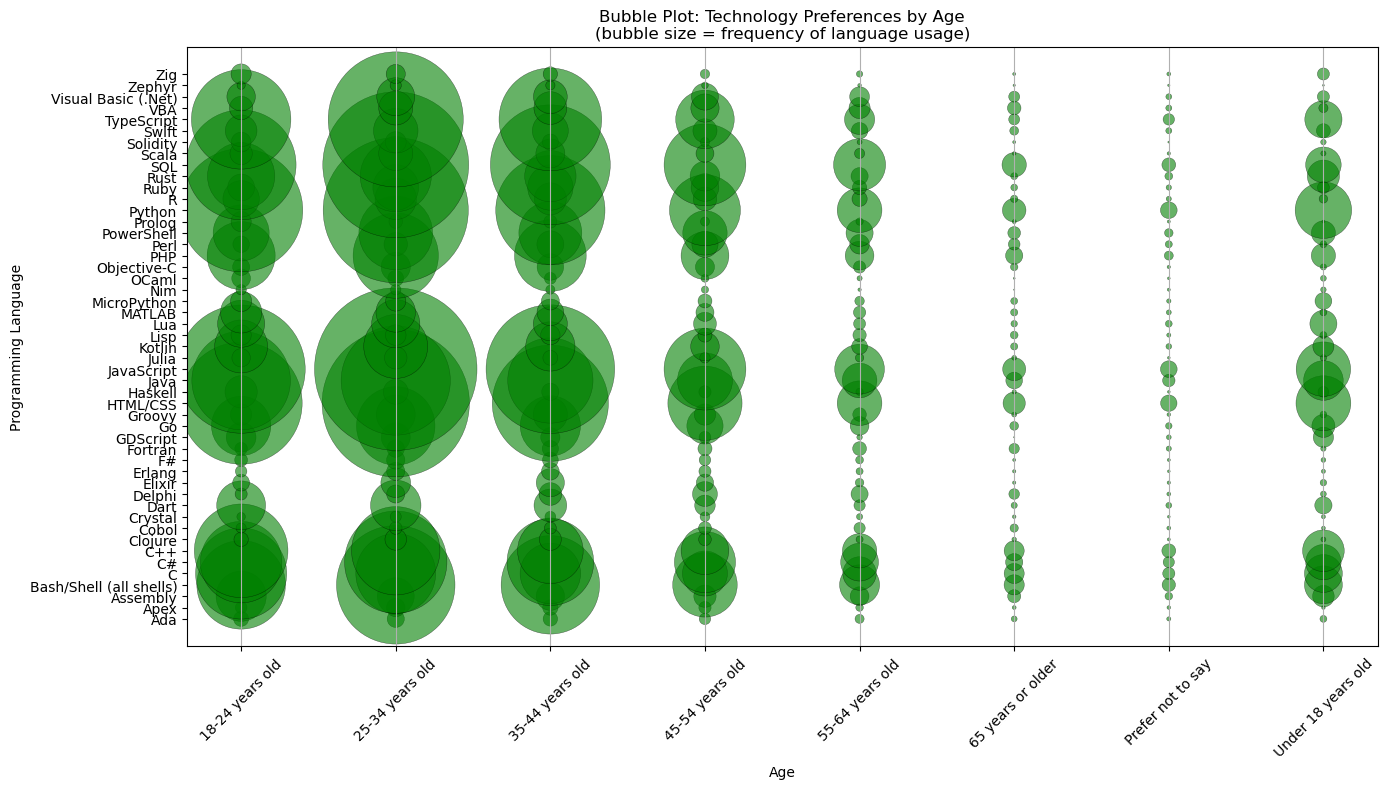

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)

# Drop rows with missing Age or LanguageHaveWorkedWith
df_clean = df.dropna(subset=['Age', 'LanguageHaveWorkedWith'])

# Explode the multi-response field into individual rows
df_clean.loc[:, 'LanguageHaveWorkedWith'] = df_clean['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df_clean.explode('LanguageHaveWorkedWith')

# Group by Age and Language, then count frequency
lang_age_freq = df_exploded.groupby(['Age', 'LanguageHaveWorkedWith']).size().reset_index(name='Frequency')

# Plot
plt.figure(figsize=(14, 8))

scatter = plt.scatter(
    lang_age_freq['Age'], 
    lang_age_freq['LanguageHaveWorkedWith'], 
    s=lang_age_freq['Frequency'], 
    alpha=0.6, 
    c='green', 
    edgecolors='black', 
    linewidth=0.3
)

plt.xlabel('Age')
plt.ylabel('Programming Language')
plt.title('Bubble Plot: Technology Preferences by Age\n(bubble size = frequency of language usage)')
plt.grid(True, axis='x')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
2. Bubble Plot for Preferred Databases vs. Job Satisfaction
Explore the relationship between preferred databases (DatabaseWantToWorkWith) and job satisfaction.

Use bubble size to indicate the number of respondents for each database.

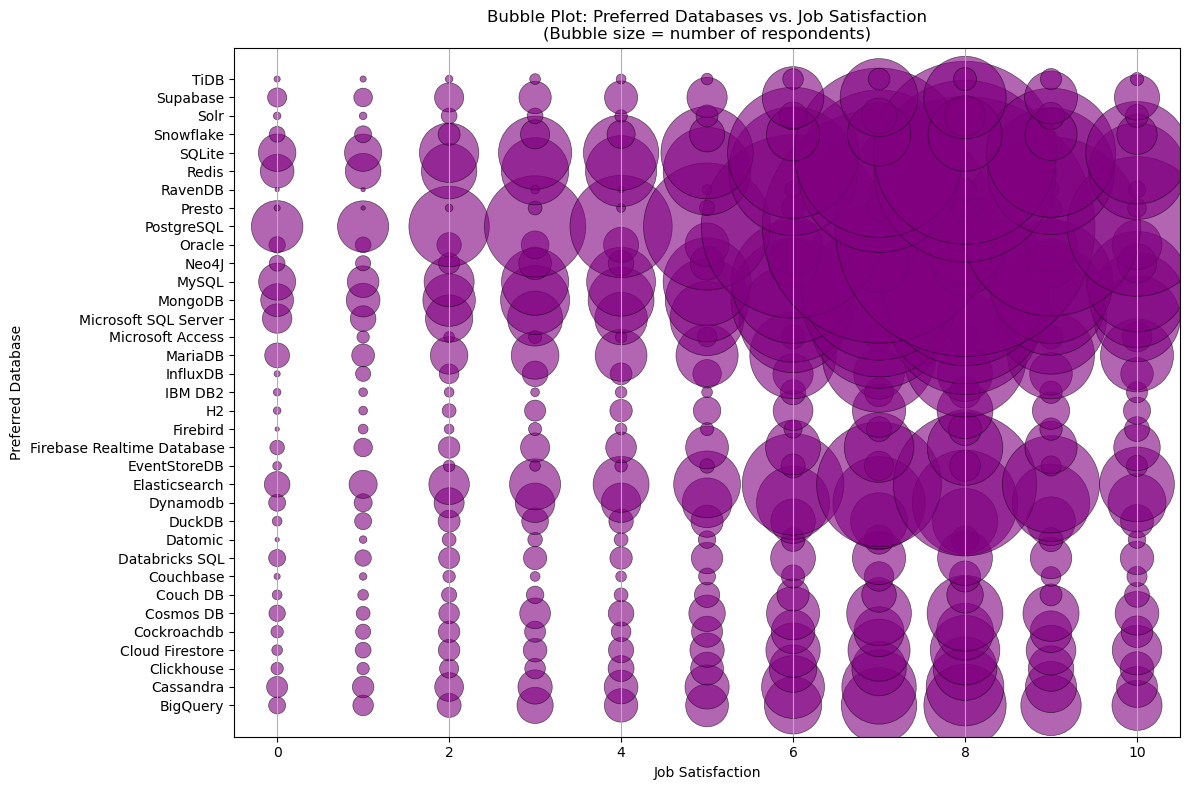

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)

# Drop rows with missing values in relevant columns
df_clean = df.dropna(subset=['DatabaseWantToWorkWith', 'JobSat'])

# Split multi-select column into lists
df_clean.loc[:, 'DatabaseWantToWorkWith'] = df_clean['DatabaseWantToWorkWith'].str.split(';')

# Explode so each database is a separate row
df_exploded = df_clean.explode('DatabaseWantToWorkWith')

# Group by database and job satisfaction, count respondents
grouped = df_exploded.groupby(['DatabaseWantToWorkWith', 'JobSat']).size().reset_index(name='RespondentCount')

# Plot bubble chart
plt.figure(figsize=(12, 8))

scatter = plt.scatter(
    grouped['JobSat'],                # X-axis: job satisfaction
    grouped['DatabaseWantToWorkWith'], # Y-axis: databases
    s=grouped['RespondentCount'] * 10,  # Bubble size (scale for visibility)
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5,
    c='purple'
)

plt.xlabel('Job Satisfaction')
plt.ylabel('Preferred Database')
plt.title('Bubble Plot: Preferred Databases vs. Job Satisfaction\n(Bubble size = number of respondents)')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [ ]:
Task 3: Comparing Data Using Bubble Plots
1. Bubble Plot for Compensation Across Developer Roles
Visualize compensation (ConvertedCompYearly) across different developer roles (DevType).

Use bubble size to represent job satisfaction.

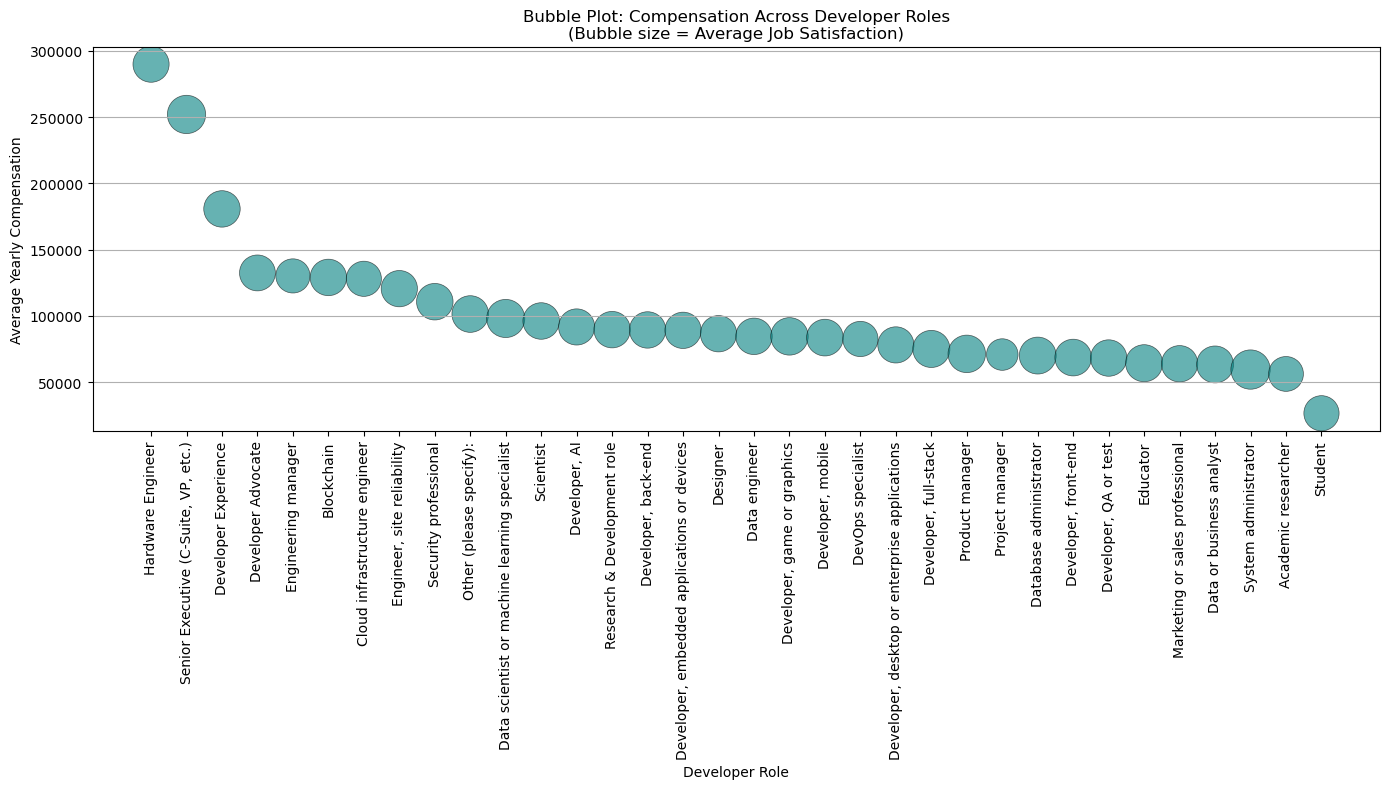

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)

# Clean: drop rows with missing compensation, DevType, or JobSat
df_clean = df.dropna(subset=['ConvertedCompYearly', 'DevType', 'JobSat'])

# Split DevType (multi-response) into lists and explode
df_clean.loc[:, 'DevType'] = df_clean['DevType'].str.split(';')
df_exploded = df_clean.explode('DevType')

# For better visuals, you can group by DevType and calculate mean compensation and job satisfaction
grouped = df_exploded.groupby('DevType').agg({
    'ConvertedCompYearly': 'mean',
    'JobSat': 'mean',
    'ResponseId': 'count'  # number of respondents per role
}).reset_index()

# Normalize job satisfaction for bubble sizes (optional)
bubble_sizes = grouped['JobSat'] * 100  # adjust multiplier for visibility

# Sort by average compensation (optional)
grouped = grouped.sort_values('ConvertedCompYearly', ascending=False)

# Plot
plt.figure(figsize=(14, 8))
plt.scatter(
    grouped['DevType'],
    grouped['ConvertedCompYearly'],
    s=bubble_sizes,
    alpha=0.6,
    c='teal',
    edgecolors='black',
    linewidth=0.5
)

plt.xticks(rotation=90)
plt.xlabel('Developer Role')
plt.ylabel('Average Yearly Compensation')
plt.title('Bubble Plot: Compensation Across Developer Roles\n(Bubble size = Average Job Satisfaction)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
2. Bubble Plot for Collaboration Tools by Age
Visualize the relationship between the collaboration tools used (NEWCollabToolsHaveWorkedWith) and age groups.

Use bubble size to represent the frequency of tool usage.



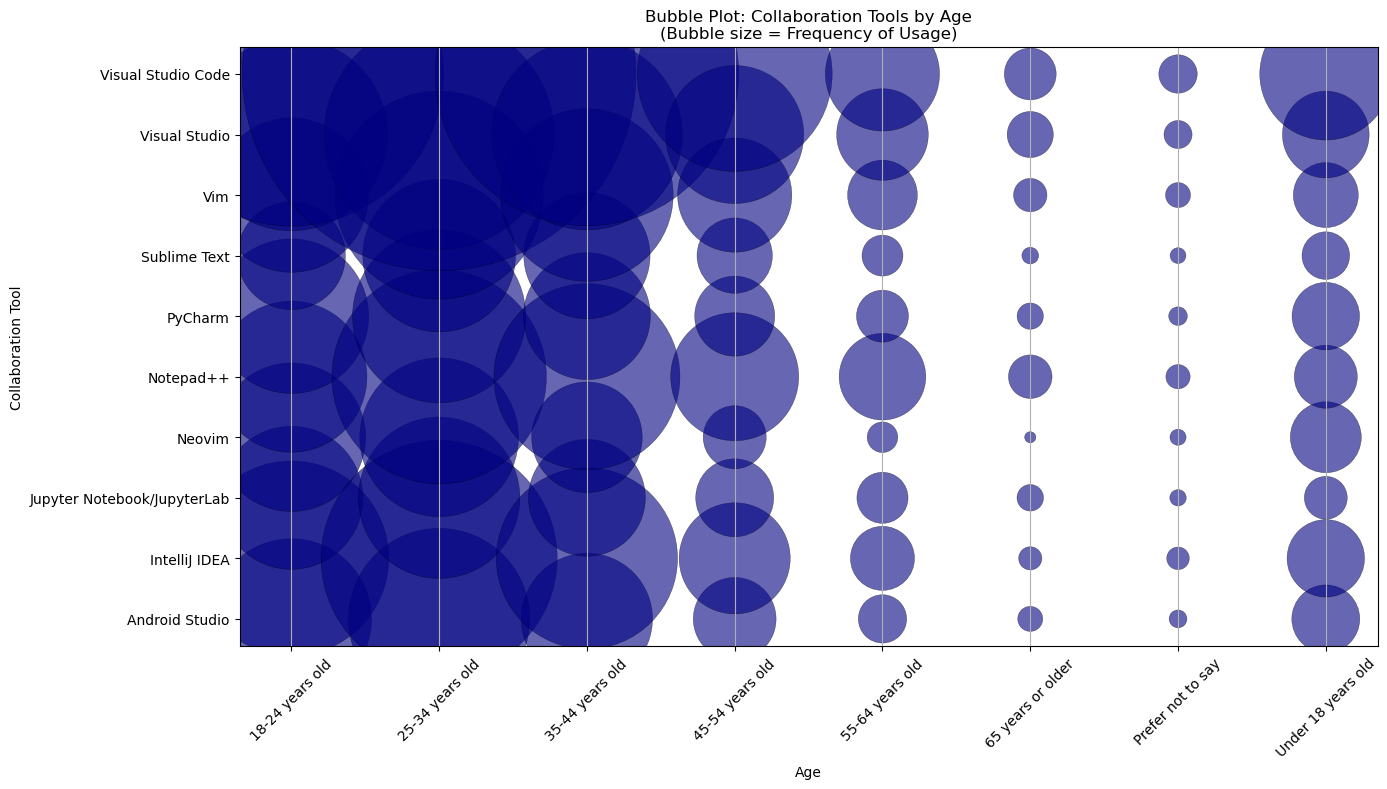

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)

# Clean: drop rows with missing age or collaboration tools
df_clean = df.dropna(subset=['Age', 'NEWCollabToolsHaveWorkedWith'])

# Split multi-response field into lists
df_clean.loc[:, 'NEWCollabToolsHaveWorkedWith'] = df_clean['NEWCollabToolsHaveWorkedWith'].str.split(';')

# Explode so each tool is a separate row
df_exploded = df_clean.explode('NEWCollabToolsHaveWorkedWith')

# Group by age and tool, count frequency
freq = df_exploded.groupby(['Age', 'NEWCollabToolsHaveWorkedWith']).size().reset_index(name='Frequency')

# Optional: Filter out rare age groups or tools to improve plot clarity
# For example, keep top 10 tools by total usage:
top_tools = freq.groupby('NEWCollabToolsHaveWorkedWith')['Frequency'].sum().sort_values(ascending=False).head(10).index
freq_filtered = freq[freq['NEWCollabToolsHaveWorkedWith'].isin(top_tools)]

# Plot
plt.figure(figsize=(14, 8))
plt.scatter(
    freq_filtered['Age'],
    freq_filtered['NEWCollabToolsHaveWorkedWith'],
    s=freq_filtered['Frequency'] * 5,  # scale bubble sizes
    alpha=0.6,
    edgecolors='black',
    linewidth=0.3,
    c='navy'
)

plt.xlabel('Age')
plt.ylabel('Collaboration Tool')
plt.title('Bubble Plot: Collaboration Tools by Age\n(Bubble size = Frequency of Usage)')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [ ]:
Task 4: Visualizing Technology Trends Using Bubble Plots
1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction
Explore the relationship between preferred web frameworks (WebframeWantToWorkWith) and job satisfaction.

Use bubble size to represent the number of respondents.

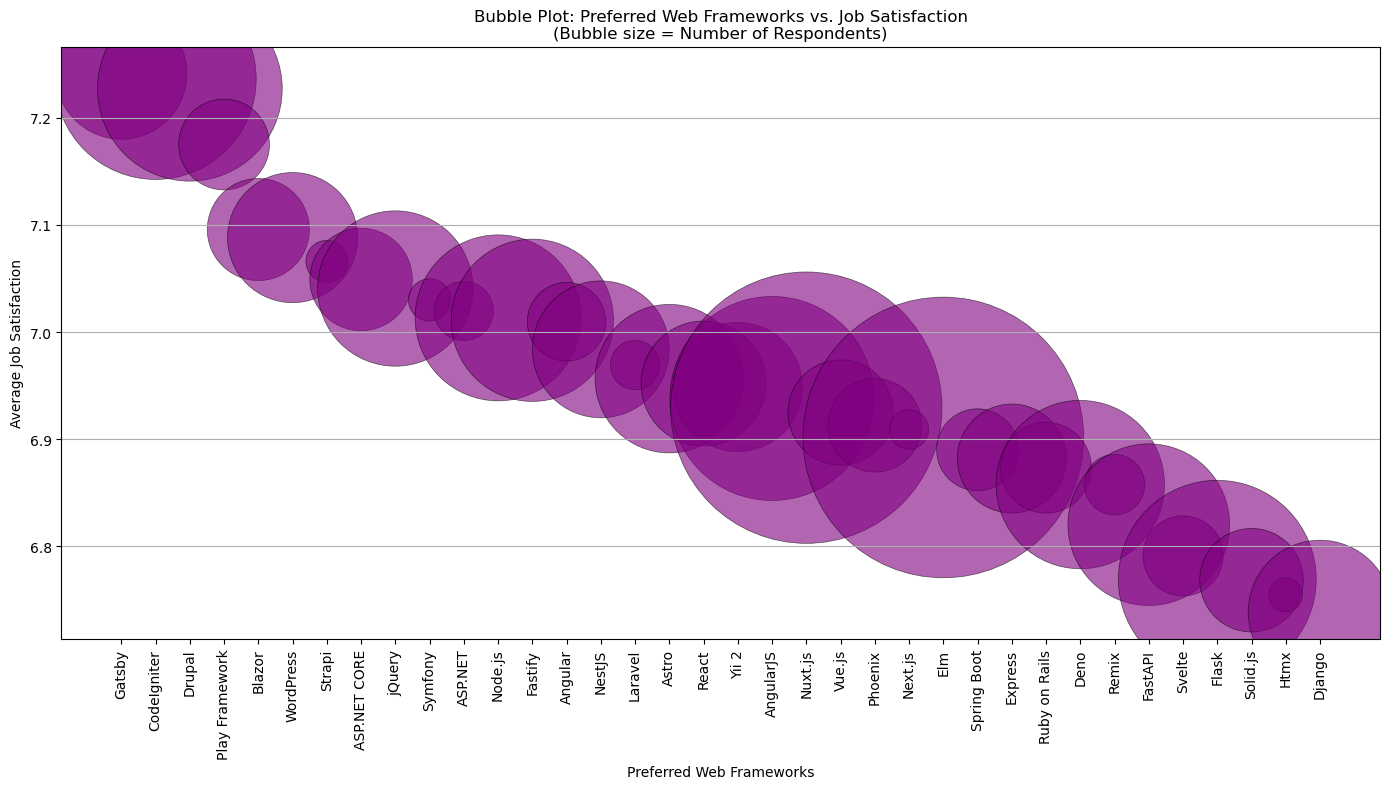

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)

# Clean data: drop missing WebframeWantToWorkWith or JobSat
df_clean = df.dropna(subset=['WebframeWantToWorkWith', 'JobSat'])

# Split multi-select into lists and explode
df_clean.loc[:, 'WebframeWantToWorkWith'] = df_clean['WebframeWantToWorkWith'].str.split(';')
df_exploded = df_clean.explode('WebframeWantToWorkWith')

# Group by framework: average JobSat and count respondents
grouped = df_exploded.groupby('WebframeWantToWorkWith').agg({
    'JobSat': 'mean',
    'ResponseId': 'count'
}).reset_index()

# Scale bubble sizes (number of respondents)
bubble_sizes = grouped['ResponseId'] * 5  # Adjust multiplier for visibility

# Sort by average job satisfaction (optional)
grouped = grouped.sort_values('JobSat', ascending=False)

# Plot
plt.figure(figsize=(14, 8))
plt.scatter(
    grouped['WebframeWantToWorkWith'], 
    grouped['JobSat'], 
    s=bubble_sizes, 
    alpha=0.6, 
    c='purple', 
    edgecolors='black', 
    linewidth=0.5
)

plt.xticks(rotation=90)
plt.xlabel('Preferred Web Frameworks')
plt.ylabel('Average Job Satisfaction')
plt.title('Bubble Plot: Preferred Web Frameworks vs. Job Satisfaction\n(Bubble size = Number of Respondents)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
2. Bubble Plot for Admired Technologies Across Countries
Visualize the distribution of admired technologies (LanguageAdmired) across different countries (Country).

Use bubble size to represent the frequency of admiration.

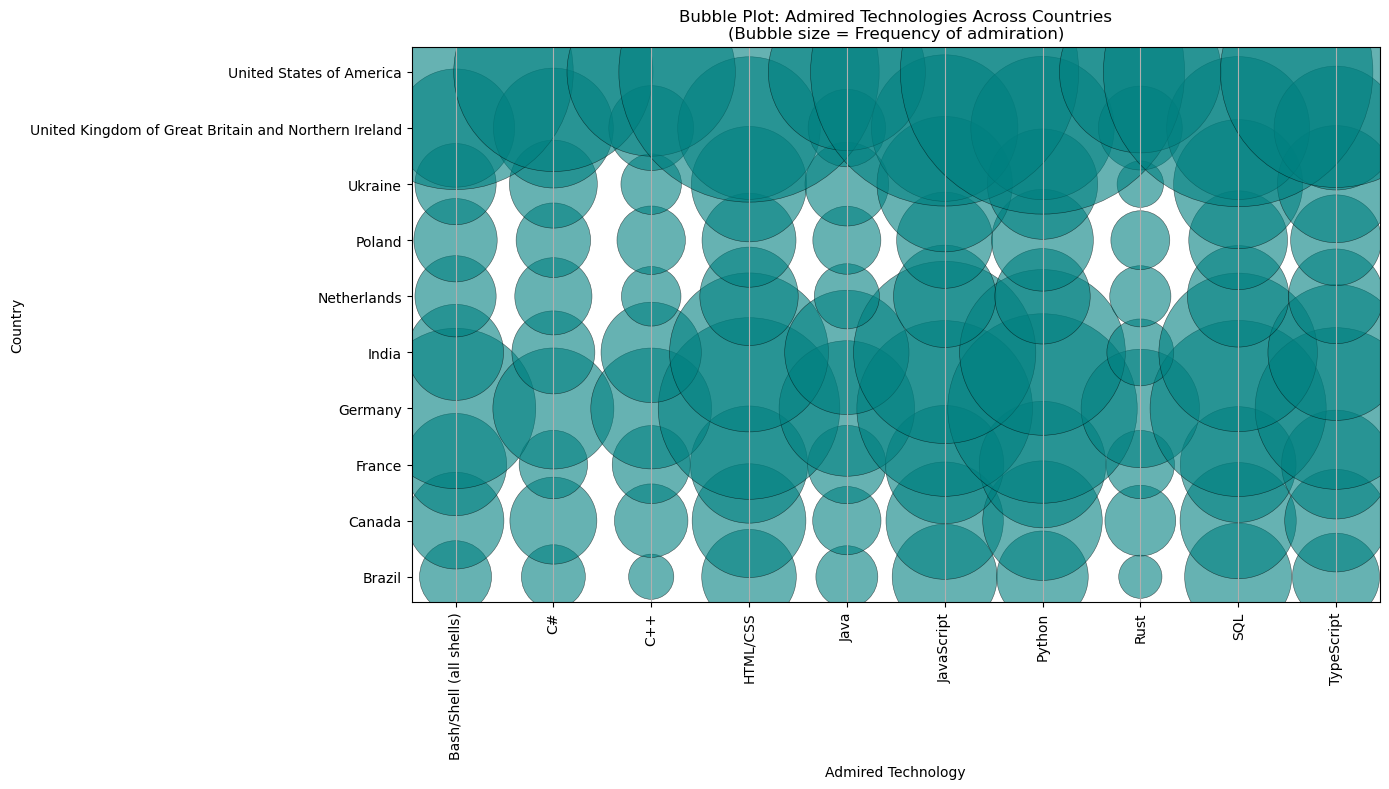

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)

# Drop rows with missing data
df_clean = df.dropna(subset=['LanguageAdmired', 'Country'])

# Split and explode admired languages
df_clean.loc[:, 'LanguageAdmired'] = df_clean['LanguageAdmired'].str.split(';')
df_exploded = df_clean.explode('LanguageAdmired')

# Group by country and admired language, count frequency
freq = df_exploded.groupby(['Country', 'LanguageAdmired']).size().reset_index(name='Frequency')

# Optional: filter top N countries or languages to keep plot readable
top_countries = freq.groupby('Country')['Frequency'].sum().sort_values(ascending=False).head(10).index
top_languages = freq.groupby('LanguageAdmired')['Frequency'].sum().sort_values(ascending=False).head(10).index
freq_filtered = freq[(freq['Country'].isin(top_countries)) & (freq['LanguageAdmired'].isin(top_languages))]

# Plot
plt.figure(figsize=(14, 8))
plt.scatter(
    freq_filtered['LanguageAdmired'],
    freq_filtered['Country'],
    s=freq_filtered['Frequency'] * 10,  # Adjust size multiplier as needed
    alpha=0.6,
    c='teal',
    edgecolors='black',
    linewidth=0.4
)

plt.xlabel('Admired Technology')
plt.ylabel('Country')
plt.title('Bubble Plot: Admired Technologies Across Countries\n(Bubble size = Frequency of admiration)')
plt.xticks(rotation=90)
plt.grid(axis='x')
plt.tight_layout()
plt.show()
